
<a id='wald-friedman'></a>
<a href="#"><img src="/_static/img/jupyter-notebook-download-blue.svg" id="notebook_download_badge"></a>

<script>
var path = window.location.pathname;
var pageName = path.split("/").pop().split(".")[0];
var downloadLink = ["/", "_downloads/ipynb/py/", pageName, ".ipynb"].join("");
document.getElementById('notebook_download_badge').parentElement.setAttribute('href', downloadLink);
</script>

<a href="/status.html"><img src="https://img.shields.io/badge/Execution%20test-not%20available-lightgrey.svg" id="executability_status_badge"></a>

<div class="how-to">
        <a href="#" class="toggle"><span class="icon icon-angle-double-down"></span>How to read this lecture...</a>
        <div class="how-to-content">
                <p>Code should execute sequentially if run in a Jupyter notebook</p>
                <ul>
                        <li>See the <a href="/py/getting_started.html">set up page</a> to install Jupyter, Python and all necessary libraries</li>
                        <li>Please direct feedback to <a href="mailto:contact@quantecon.org">contact@quantecon.org</a> or the <a href="http://discourse.quantecon.org/">discourse forum</a></li>
                </ul>
        </div>
</div>

# A Problem that Stumped Milton Friedman

(and that Abraham Wald solved by inventing sequential analysis)


<a id='index-1'></a>

## Contents

- [A Problem that Stumped Milton Friedman](#A-Problem-that-Stumped-Milton-Friedman)  
  - [Overview](#Overview)  
  - [Origin of the problem](#Origin-of-the-problem)  
  - [A dynamic programming approach](#A-dynamic-programming-approach)  
  - [Implementation](#Implementation)  
  - [Analysis](#Analysis)  
  - [Comparison with Neyman-Pearson formulation](#Comparison-with-Neyman-Pearson-formulation)  

Co-authors: [Chase Coleman](https://github.com/cc7768)

## Overview

This lecture describes a statistical decision problem encountered  by Milton Friedman and W. Allen Wallis during World War II when they were analysts at the U.S. Government’s  Statistical Research Group at Columbia University

This problem led Abraham Wald [[Wal47]](zreferences.ipynb#wald47) to formulate **sequential analysis**, an approach to statistical decision problems intimately related to dynamic programming

In this lecture, we apply dynamic programming algorithms to Friedman and Wallis and Wald’s problem

Key ideas in play will be:

- Bayes’ Law  
- Dynamic programming  
- Type I and type II statistical errors  
  - a type I error occurs when you reject a null hypothesis that is true  
  - a type II error is when you accept a null hypothesis that is false  
- Abraham Wald’s **sequential probability ratio test**  
- The **power** of a statistical test  
- The **critical region** of a statistical test  
- A **uniformly most powerful test**  

## Origin of the problem

On pages 137-139 of his 1998 book *Two Lucky People* with Rose Friedman [[FF98]](zreferences.ipynb#friedman98),
Milton Friedman described a problem presented to him and Allen Wallis
during World War II, when they worked at the US Government’s
Statistical Research Group at Columbia University

Let’s listen to Milton Friedman tell us what happened

“In order to understand the story, it is necessary to have an idea of a
simple statistical problem, and of the standard procedure for dealing
with it. The actual problem out of which sequential analysis grew will
serve. The Navy has two alternative designs (say A and B) for a
projectile. It wants to determine which is superior. To do so it
undertakes a series of paired firings. On each round it assigns the
value 1 or 0 to A accordingly as its performance is superior or inferior
to that of B and conversely 0 or 1 to B. The Navy asks the statistician
how to conduct the test and how to analyze the results.

“The standard statistical answer was to specify a number of firings (say
1,000) and a pair of percentages (e.g., 53% and 47%) and tell the client
that if A receives a 1 in more than 53% of the firings, it can be
regarded as superior; if it receives a 1 in fewer than 47%, B can be
regarded as superior; if the percentage is between 47% and 53%, neither
can be so regarded.

“When Allen Wallis was discussing such a problem with (Navy) Captain
Garret L. Schyler, the captain objected that such a test, to quote from
Allen’s account, may prove wasteful. If a wise and seasoned ordnance
officer like Schyler were on the premises, he would see after the first
few thousand or even few hundred [rounds] that the experiment need not
be completed either because the new method is obviously inferior or
because it is obviously superior beyond what was hoped for
$ \ldots $ “

Friedman and Wallis struggled with the problem but, after realizing that
they were not able to solve it,  described the problem to  Abraham Wald

That started Wald on the path that led him  to *Sequential Analysis* [[Wal47]](zreferences.ipynb#wald47)

We’ll formulate the problem using dynamic programming

## A dynamic programming approach

The following presentation of the problem closely follows Dmitri
Berskekas’s treatment in **Dynamic Programming and Stochastic Control** [[Ber75]](zreferences.ipynb#bertekas75)

A decision maker observes iid draws of a random variable $ z $

He (or she) wants to know which of two probability distributions $ f_0 $ or $ f_1 $ governs $ z $

After a number of draws, also to be determined, he makes a decision as to which of the distributions is generating the draws he observes

To help formalize the problem, let $ x \in \{x_0, x_1\} $ be a hidden state that indexes the two distributions:

$$
\mathbb P\{z = v \mid x \}
= \begin{cases}
    f_0(v) & \mbox{if } x = x_0, \\
    f_1(v) & \mbox{if } x = x_1
\end{cases}
$$

Before observing any outcomes, the decision maker believes that the probability that $ x = x_0 $ is

$$
p_{-1} =
\mathbb P \{ x=x_0 \mid \textrm{ no observations} \} \in (0, 1)
$$

After observing $ k+1 $ observations $ z_k, z_{k-1}, \ldots, z_0 $, he updates this value to

$$
p_k = \mathbb P \{ x = x_0 \mid z_k, z_{k-1}, \ldots, z_0 \},
$$

which is calculated recursively by applying Bayes’ law:

$$
p_{k+1} = \frac{ p_k f_0(z_{k+1})}{ p_k f_0(z_{k+1}) + (1-p_k) f_1 (z_{k+1}) },
\quad k = -1, 0, 1, \ldots
$$

After observing $ z_k, z_{k-1}, \ldots, z_0 $, the decision maker believes that $ z_{k+1} $ has probability distribution

$$
f(v) = p_k f_0(v) + (1-p_k) f_1 (v)
$$

This is a mixture of distributions $ f_0 $ and $ f_1 $, with the weight on $ f_0 $ being the posterior probability that $ x = x_0 $ 1

To help illustrate this kind of distribution, let’s inspect some mixtures of beta distributions

The density of a beta probability distribution with parameters $ a $ and $ b $ is

$$
f(z; a, b) = \frac{\Gamma(a+b) z^{a-1} (1-z)^{b-1}}{\Gamma(a) \Gamma(b)}
\quad \text{where} \quad
\Gamma(t) := \int_{0}^{\infty} x^{t-1} e^{-x} dx
$$

We’ll discretize this distribution to make it more straightforward to work with

The next figure shows two discretized beta distributions in the top panel

The bottom panel presents mixtures of these distributions, with various mixing probabilities $ p_k $

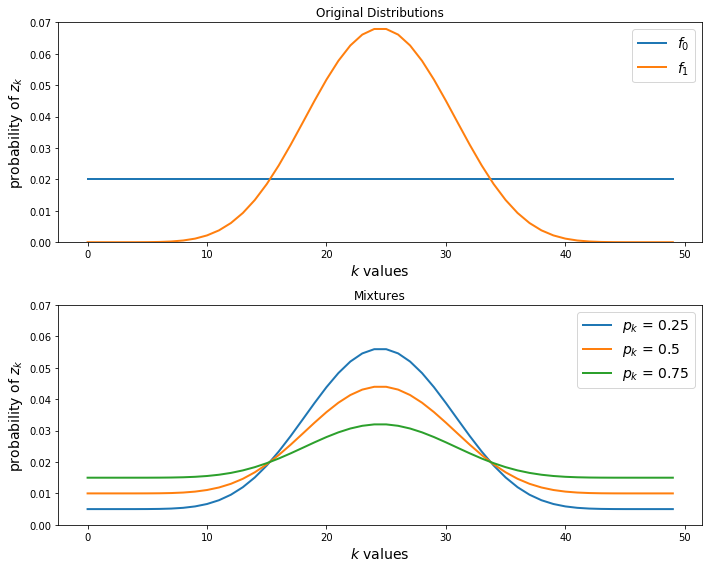

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st


def make_distribution_plots(f0, f1):
    """
    This generates the figure that shows the initial versions
    of the distributions and plots their combinations.
    """
    fig, axes = plt.subplots(2, figsize=(10, 8))

    axes[0].set_title("Original Distributions")
    axes[0].plot(f0, lw=2, label="$f_0$")
    axes[0].plot(f1, lw=2, label="$f_1$")

    axes[1].set_title("Mixtures")
    for p in 0.25, 0.5, 0.75:
        y = p * f0 + (1 - p) * f1
        axes[1].plot(y, lw=2, label=f"$p_k$ = {p}")

    for ax in axes:
        ax.legend(fontsize=14)
        ax.set_xlabel("$k$ values", fontsize=14)
        ax.set_ylabel("probability of $z_k$", fontsize=14)
        ax.set_ylim(0, 0.07)

    plt.tight_layout()
    plt.show()


p_m1 = np.linspace(0, 1, 50)
f0 = np.clip(st.beta.pdf(p_m1, a=1, b=1), 1e-8, np.inf)
f0 = f0 / np.sum(f0)
f1 = np.clip(st.beta.pdf(p_m1, a=9, b=9), 1e-8, np.inf)
f1 = f1 / np.sum(f1)

make_distribution_plots(f0, f1)

### Losses and costs

After observing $ z_k, z_{k-1}, \ldots, z_0 $, the decision maker
chooses among three distinct actions:

- He decides that $ x = x_0 $ and draws no more $ z $‘s  
- He decides that $ x = x_1 $ and draws no more $ z $‘s  
- He postpones deciding now and instead chooses to draw a
  $ z_{k+1} $  


Associated with these three actions, the decision maker can suffer three
kinds of losses:

- A loss $ L_0 $ if he decides $ x = x_0 $ when actually
  $ x=x_1 $  
- A loss $ L_1 $ if he decides $ x = x_1 $ when actually
  $ x=x_0 $  
- A cost $ c $ if he postpones deciding and chooses instead to draw
  another $ z $  

### Digression on type I and type II errors

If we regard  $ x=x_0 $ as a null hypothesis and $ x=x_1 $ as an alternative hypothesis,
then $ L_1 $ and $ L_0 $ are losses associated with two types of statistical errors.

- a type I error is an incorrect rejection of a true null hypothesis (a “false positive”)  
- a type II error is a failure to reject a false null hypothesis (a “false negative”)  


So when we treat $ x=x_0 $ as the null hypothesis

- We can think of $ L_1 $ as the loss associated with a type I
  error  
- We can think of $ L_0 $ as the loss associated with a type II
  error  

### Intuition

Let’s try to guess what an optimal decision rule might look like before we go further

Suppose at some given point in time that $ p $ is close to 1

Then our prior beliefs and the evidence so far point strongly to $ x = x_0 $

If, on the other hand, $ p $ is close to 0, then $ x = x_1 $ is strongly favored

Finally, if $ p $ is in the middle of the interval $ [0, 1] $, then we have little information in either direction

This reasoning suggests a decision rule such as the one shown in the figure

<img src="_static/figures/wald_dec_rule.png" style="width:40%;height:40%">

  
As we’ll see, this is indeed the correct form of the decision rule

The key problem is to determine the threshold values $ \alpha, \beta $,
which will depend on the parameters listed above

You might like to pause at this point and try to predict the impact of a
parameter such as $ c $ or $ L_0 $ on $ \alpha $ or $ \beta $

### A Bellman equation

Let $ J(p) $ be the total loss for a decision maker with current belief $ p $ who chooses optimally

With some thought, you will agree that $ J $ should satisfy the Bellman equation


<a id='equation-new1'></a>
<table width=100%><tr style='background-color: #FFFFFF !important;'>
<td width=10%></td>
<td width=80%>
$$
J(p) =
    \min
    \left\{
        (1-p) L_0, \; p L_1, \;
        c + \mathbb E [ J (p') ]
    \right\}
$$
</td><td width=10% style='text-align:center !important;'>
(1)
</td></tr></table>

where $ p' $ is the random variable defined by

$$
p' = \frac{ p f_0(z)}{ p f_0(z) + (1-p) f_1 (z) }
$$

when $ p $ is fixed and $ z $ is drawn from the current best guess, which is the distribution $ f $ defined by

$$
f(v) = p f_0(v) + (1-p) f_1 (v)
$$

In the Bellman equation, minimization is over three actions:

1. accept $ x_0 $  
1. accept $ x_1 $  
1. postpone deciding and draw again  


Let

$$
A(p)
:= \mathbb E [ J (p') ]
$$

Then we can represent the  Bellman equation as

$$
J(p) =
\min \left\{ (1-p) L_0, \; p L_1, \; c + A(p) \right\}
$$

where $ p \in [0,1] $

Here

- $ (1-p) L_0 $ is the expected loss associated with accepting
  $ x_0 $ (i.e., the cost of making a type II error)  
- $ p L_1 $ is the expected loss associated with accepting
  $ x_1 $ (i.e., the cost of making a type I error)  
- $ c + A(p) $ is the expected cost associated with drawing one more $ z $  


The optimal decision rule is characterized by two numbers $ \alpha, \beta \in (0,1) \times (0,1) $ that satisfy

$$
(1- p) L_0 < \min \{ p L_1, c + A(p) \}  \textrm { if } p \geq \alpha
$$

and

$$
p L_1 < \min \{ (1-p) L_0,  c + A(p) \} \textrm { if } p \leq \beta
$$

The optimal decision rule is then

$$
\textrm { accept } x=x_0 \textrm{ if } p \geq \alpha \\
\textrm { accept } x=x_1 \textrm{ if } p \leq \beta \\
\textrm { draw another }  z \textrm{ if }  \beta \leq p \leq \alpha
$$

Our aim is to compute the value function $ J $, and from it the associated cutoffs $ \alpha $
and $ \beta $

One sensible approach is to write the three components of $ J $
that appear on the right side of the Bellman equation as separate functions

Later, doing this will help us obey **the don’t repeat yourself (DRY)** golden rule of coding

## Implementation

Let’s code this problem up and solve it

To approximate the value function that solves Bellman equation [(1)](#equation-new1), we
use value function iteration

- For earlier examples of this technique see the [shortest path](short_path.ipynb#), [job search](mccall_model.ipynb#) or [optimal growth](optgrowth.ipynb#) lectures  


As in the [optimal growth lecture](optgrowth.ipynb#), to approximate a continuous value function

- We iterate at a finite grid of possible values of $ p $  
- When we evaluate $ A(p) $ between grid points, we use linear interpolation  


This means that to evaluate $ J(p) $ where $ p $ is not a grid point, we must use two points:

- First, we use the largest of all the grid points smaller than $ p $, and call it $ p_i $  
- Second, we use the grid point immediately after $ p $, named $ p_{i+1} $, to approximate the function value as  


$$
J(p) = J(p_i) + (p - p_i) \frac{J(p_{i+1}) - J(p_i)}{p_{i+1} - p_{i}}
$$

In one dimension, you can think of this as simply drawing a line between each pair of points on the grid

Here’s the code

In [2]:
import scipy.interpolate as interpolate
import quantecon as qe

def expect_loss_choose_0(p, L0):
    "For a given probability return expected loss of choosing model 0"
    return (1 - p) * L0

def expect_loss_choose_1(p, L1):
    "For a given probability return expected loss of choosing model 1"
    return p * L1

def EJ(p, f0, f1, J):
    """
    Evaluates the expectation of our value function J. To do this, we
    need the current probability that model 0 is correct (p), the
    distributions (f0, f1), and the function J.
    """
    # Get the current distribution we believe (p*f0 + (1-p)*f1)
    curr_dist = p * f0 + (1 - p) * f1
    
    # Get tomorrow's expected distribution through Bayes law
    tp1_dist = np.clip((p * f0) / (p * f0 + (1 - p) * f1), 0, 1)
    
    # Evaluate the expectation
    EJ = curr_dist @ J(tp1_dist)
    
    return EJ

def expect_loss_cont(p, c, f0, f1, J):
    return c + EJ(p, f0, f1, J)


def bellman_operator(pgrid, c, f0, f1, L0, L1, J):
    """
    Evaluates the value function for a given continuation value
    function; that is, evaluates

        J(p) = min((1 - p) L0, p L1, c + E J(p'))

    Uses linear interpolation between points.
    """
    m = np.size(pgrid)
    assert m == np.size(J)
    
    J_out = np.zeros(m)
    J_interp = interpolate.UnivariateSpline(pgrid, J, k=1, ext=0)

    for (p_ind, p) in enumerate(pgrid):
        # Payoff of choosing model 0
        p_c_0 = expect_loss_choose_0(p, L0)
        p_c_1 = expect_loss_choose_1(p, L1)
        p_con = expect_loss_cont(p, c, f0, f1, J_interp)
        
        J_out[p_ind] = min(p_c_0, p_c_1, p_con)

    return J_out


#  == Now run at given parameters == #

#  First set up distributions 
p_m1 = np.linspace(0, 1, 50)
f0 = np.clip(st.beta.pdf(p_m1, a=1, b=1), 1e-8, np.inf)
f0 = f0 / np.sum(f0)
f1 = np.clip(st.beta.pdf(p_m1, a=9, b=9), 1e-8, np.inf)
f1 = f1 / np.sum(f1)

# Build a grid
pg = np.linspace(0, 1, 251)
# Turn the Bellman operator into a function with one argument
bell_op = lambda vf: bellman_operator(pg, 0.5, f0, f1, 5.0, 5.0, vf)
# Pass it to qe's built in iteration routine
J = qe.compute_fixed_point(bell_op, 
                            np.zeros(pg.size),  # Initial guess
                            error_tol=1e-6, 
                            verbose=True, 
                            print_skip=5)


Running it produces the following output on our machine

The distance column shows the maximal distance between successive iterates

This converges to zero quickly, indicating a successful iterative procedure

Iteration terminates when the distance falls below some threshold

### A more sophisticated implementation

Now for some gentle criticisms of the preceding code

By writing the code in terms of functions, we have to pass around
some things that are constant throughout the problem

- $ c $, $ f_0 $, $ f_1 $, $ L_0 $, and $ L_1 $  


So now let’s turn our simple script into a class

This will allow us to simplify the function calls and make the code more reusable

We shall construct a class that

- stores all of our parameters for us internally  
- incorporates many of the same functions that we used above  
- allows us, in addition, to simulate draws and the decision process under different prior beliefs  

In [68]:
import quantecon as qe
from numba import njit, prange
from interpolation import interp


class WaldFriedman:
    
    def __init__(self, 
                 c=1.25,   # Cost of another draw
                 a0=2.5,
                 a1=2,
                 b0=2,
                 b1=2.5,
                 L0=25,    # Cost of selecting x0 when x1 is true
                 L1=25,    # Cost of selecting x1 when x0 is true
                 m=25):
        
        self.c, self.m = c, m
        self.L0, self.L1 = L0, L1
        self.p_grid = np.linspace(0.0, 1.0, m)

        # Set up distributions
        f0 = np.clip(st.beta.pdf(np.linspace(0, 1, m), a=a0, b=b0), 1e-6, np.inf)
        self.f0 = f0 / np.sum(f0)
        f1 = np.clip(st.beta.pdf(np.linspace(0, 1, m), a=a1, b=b1), 1e-6, np.inf)
        self.f1 = f1 / np.sum(f1)  # Make sure sums to 1

In [69]:
def operator_factory(wf, parallel_flag=True):
    
    c, m, p_grid = wf.c, wf.m, wf.p_grid
    L0, L1 = wf.L0, wf.L1
    f0, f1 = wf.f0, wf.f1
    
    @njit
    def clip(val):
        if val > 1.:
            return 1.
        elif val < 0.:
            return 0.
        else:
            return val
    
    @njit(parallel=True)
    def T(j):
        j_new = np.empty(m)
        
        for i in prange(len(p_grid)):
            p = p_grid[i]
            
            payoff_f0 = (1 - p) * L0  # Payoff choosing f0
            payoff_f1 = p * L1        # Payoff choosing f1
            
            # Payoff of continuing
            current_dist = p * f0 + (1 - p) * f1
            
            # Update via Bayes
            tp1_dist = p * f0 / (p * f0 + (1 - p) * f1)
            for t, val in enumerate(tp1_dist):
                tp1_dist[t] = clip(val)
                
            # Evaluate the expectation
            Ej = current_dist @ interp(p_grid, j, tp1_dist)
            payoff_continue = c + Ej

            j_new[i] = min(payoff_f0, payoff_f1, payoff_continue)

        return j_new
    
    return T

In [70]:
def solve_model(wf,
                use_parallel=True,
                tol=1e-4,
                max_iter=1000,
                verbose=True,
                print_skip=25):

    T = operator_factory(wf, parallel_flag=use_parallel)

    # Set up loop
    j = np.zeros(len(wf.p_grid))
    i = 0
    error = tol + 1

    while i < max_iter and error > tol:
        j_new = T(j)
        error = np.max(np.abs(j - j_new))
        i += 1
        if verbose and i % print_skip == 0:
            print(f"Error at iteration {i} is {error}.")
        j = j_new

    if i == max_iter:
        print("Failed to converge!")

    if verbose and i < max_iter:
        print(f"\nConverged in {i} iterations.")

    return j_new

In [71]:
wf = WaldFriedman()
j_star = solve_model(wf)


Converged in 24 iterations.


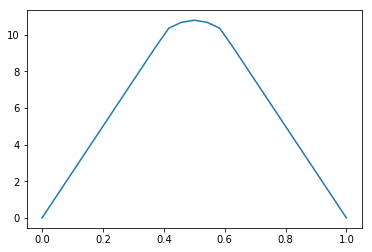

In [72]:
plt.plot(wf.p_grid, j_star)
plt.show()

We get the same output in terms of distance

The approximate value functions produced are also the same

Rather than discuss this further, let’s go ahead and use our code to generate some results

## Analysis

Now that our routines are working, let’s inspect the solutions

We’ll start with the following parameterization

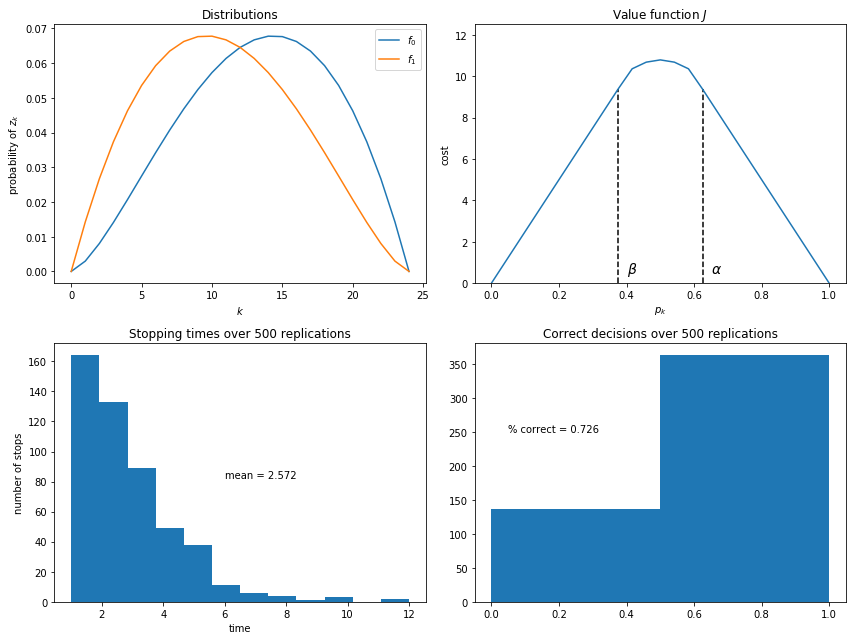

In [5]:
def analysis_plot(c=1.25, L0=25, L1=25, a0=2.5, b0=2.0, a1=2.0, b1=2.5, m=25):

    '''
    c: Cost of another draw
    L0: Cost of selecting x0 when x1 is true
    L1: Cost of selecting x1 when x0 is true
    a0, b0: Parameters for f0 (beta distribution)
    a1, b1: Parameters for f1 (beta distribution)
    m: Size of grid
    '''

    f0 = np.clip(st.beta.pdf(np.linspace(0, 1, m), a=a0, b=b0), 1e-6, np.inf)
    f0 = f0 / np.sum(f0)
    f1 = np.clip(st.beta.pdf(np.linspace(0, 1, m), a=a1, b=b1), 1e-6, np.inf)
    f1 = f1 / np.sum(f1)  # Make sure sums to 1

    # Create an instance of our WaldFriedman class
    wf = WaldFriedman(c, L0, L1, f0, f1, m=m)
    # Solve using qe's `compute_fixed_point` function
    J = wf.solve_model()
    
    lb, ub = wf.find_cutoff_rule(J)

    # Get draws
    ndraws = 500
    cdist, tdist = wf.stopping_dist(ndraws=ndraws)

    fig, ax = plt.subplots(2, 2, figsize=(12, 9))

    ax[0, 0].plot(f0, label="$f_0$")
    ax[0, 0].plot(f1, label="$f_1$")
    ax[0, 0].set(ylabel="probability of $z_k$", xlabel="$k$", title="Distributions")
    ax[0, 0].legend()

    ax[0, 1].plot(wf.pgrid, J)
    ax[0, 1].annotate(r"$\beta$", xy=(lb + 0.025, 0.5), size=14)
    ax[0, 1].annotate(r"$\alpha$", xy=(ub + 0.025, 0.5), size=14)
    ax[0, 1].vlines(lb, 0.0, payoff_choose_f1(L1, lb), linestyle="--")
    ax[0, 1].vlines(ub, 0.0, payoff_choose_f0(L0, ub), linestyle="--")
    ax[0, 1].set(ylim=(0, 0.5 * max(L0, L1)), ylabel="cost",
                       xlabel="$p_k$", title="Value function $J$")

    # Histogram the stopping times
    ax[1, 0].hist(tdist, bins=np.max(tdist))
    ax[1, 0].set_title(f"Stopping times over {ndraws} replications")
    ax[1, 0].set(xlabel="time", ylabel="number of stops")
    ax[1, 0].annotate(f"mean = {np.mean(tdist)}", xy=(max(tdist) / 2,
                      max(np.histogram(tdist, bins=max(tdist))[0]) / 2))

    ax[1, 1].hist(cdist, bins=2)
    ax[1, 1].set_title(f"Correct decisions over {ndraws} replications")
    ax[1, 1].annotate(f"% correct = {np.mean(cdist)}",
                      xy=(0.05, ndraws / 2))

    plt.tight_layout()
    plt.show()

analysis_plot()

The code to generate this figure can be found in [wald_solution_plots.py](https://github.com/QuantEcon/QuantEcon.lectures.code/blob/master/wald_friedman/wald_solution_plots.py)

### Value Function

In the top left subfigure we have the two beta distributions, $ f_0 $ and $ f_1 $

In the top right we have corresponding value function $ J $

It equals $ p L_1 $ for $ p \leq \beta $, and $ (1-p )L_0 $ for $ p
\geq \alpha $

The slopes of the two linear pieces of the value function are determined by $ L_1 $
and $ - L_0 $

The value function is smooth in the interior region, where the posterior
probability assigned to $ f_0 $ is in the indecisive region $ p \in (\beta, \alpha) $

The decision maker continues to sample until the probability that he attaches to model $ f_0 $ falls below $ \beta $ or above $ \alpha $

### Simulations

The bottom two subfigures show the outcomes of 500 simulations of the decision process

On the left is a histogram of the stopping times, which equal the number of draws of $ z_k $ required to make a decision

The average number of draws is around 6.6

On the right is the fraction of correct decisions at the stopping time

In this case the decision maker is correct 80% of the time

### Comparative statics

Now let’s consider the following exercise

We double the cost of drawing an additional observation

Before you look, think about what will happen:

- Will the decision maker be correct more or less often?  
- Will he make decisions sooner or later?  

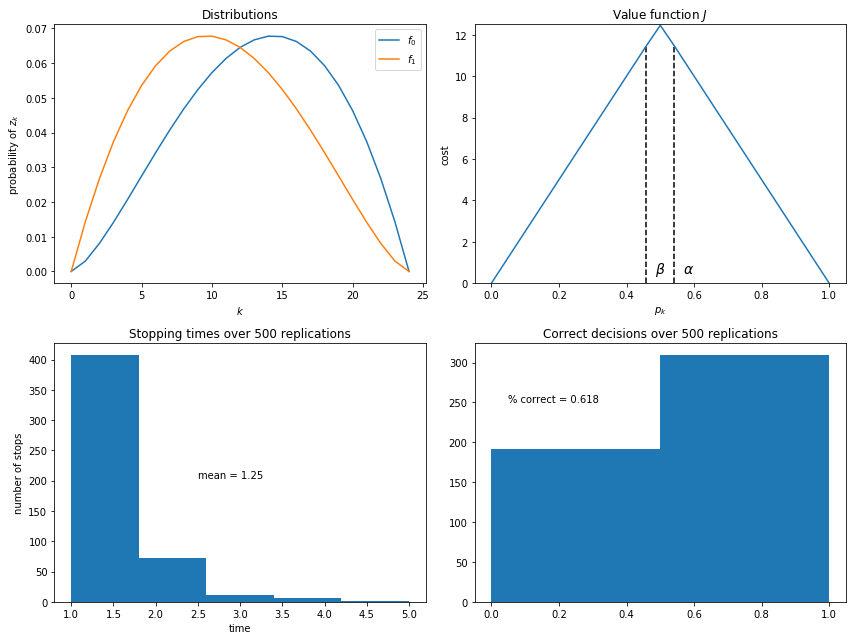

In [6]:
analysis_plot(c=2.5)

Notice what happens

The stopping times dropped dramatically!

Increased cost per draw has induced the decision maker usually to take only 1 or 2 draws before deciding

Because he decides with less, the percentage of time he is correct drops

This leads to him having a higher expected loss when he puts equal weight on both models

### A notebook implementation

To facilitate comparative statics, we provide a [Jupyter notebook](http://nbviewer.jupyter.org/github/QuantEcon/QuantEcon.notebooks/blob/master/Wald_Friedman.ipynb) that generates the same plots, but with sliders

With these sliders you can adjust parameters and immediately observe

- effects on the smoothness of the value function in the indecisive middle range as we increase the number of grid points in the piecewise linear  approximation.  
- effects of different settings for the cost parameters $ L_0, L_1, c $, the parameters of two beta distributions $ f_0 $ and $ f_1 $, and the number of points and linear functions $ m $ to use in the piece-wise continuous approximation to the value function.  
- various simulations from $ f_0 $ and associated distributions of waiting times to making a decision  
- associated histograms of correct and incorrect decisions  

## Comparison with Neyman-Pearson formulation

For several reasons, it is useful to describe the theory underlying the test
that Navy Captain G. S. Schuyler had been told to use and that led him
to approach Milton Friedman and Allan Wallis to convey his conjecture
that superior practical procedures existed

Evidently, the Navy had told
Captail Schuyler to use what it knew to be a state-of-the-art
Neyman-Pearson test

We’ll rely on Abraham Wald’s [[Wal47]](zreferences.ipynb#wald47) elegant summary of Neyman-Pearson theory

For our purposes, watch for there features of the setup:

- the assumption of a *fixed* sample size $ n $  
- the application of laws of large numbers, conditioned on alternative
  probability models, to interpret the probabilities $ \alpha $ and
  $ \beta $ defined in the Neyman-Pearson theory  


Recall that in the sequential analytic formulation above, that

- The sample size $ n $ is not fixed but rather an object to be
  chosen; technically $ n $ is a random variable  
- The parameters $ \beta $ and $ \alpha $ characterize cut-off
  rules used to determine $ n $ as a random variable  
- Laws of large numbers make no appearances in the sequential
  construction  


In chapter 1 of **Sequential Analysis** [[Wal47]](zreferences.ipynb#wald47) Abraham Wald summarizes the
Neyman-Pearson approach to hypothesis testing

Wald frames the problem as making a decision about a probability
distribution that is partially known

(You have to assume that *something* is already known in order to state a well posed problem.
Usually, *something* means *a lot*.)

By limiting  what is unknown, Wald uses the following simple structure
to illustrate the main ideas.

- a decision maker wants to decide which of two distributions
  $ f_0 $, $ f_1 $ govern an i.i.d. random variable $ z $  
- The null hypothesis $ H_0 $ is the statement that $ f_0 $
  governs the data.  
- The alternative hypothesis $ H_1 $ is the statement that
  $ f_1 $ governs the data.  
- The problem is to devise and analyze a test of hypothesis
  $ H_0 $ against the alternative hypothesis $ H_1 $ on the
  basis of a sample of a fixed number $ n $ independent
  observations $ z_1, z_2, \ldots, z_n $ of the random variable
  $ z $.  


To quote Abraham Wald,

- A test procedure leading to the acceptance or rejection of the
  hypothesis in question is simply a rule specifying, for each possible
  sample of size $ n $, whether the hypothesis should be accepted
  or rejected on the basis of the sample. This may also be expressed as
  follows: A test procedure is simply a subdivision of the totality of
  all possible samples of size $ n $ into two mutually exclusive
  parts, say part 1 and part 2, together with the application of the
  rule that the hypothesis be accepted if the observed sample is
  contained in part 2. Part 1 is also called the critical region. Since
  part 2 is the totality of all samples of size 2 which are not
  included in part 1, part 2 is uniquely determined by part 1. Thus,
  choosing a test procedure is equivalent to determining a critical
  region.  


Let’s listen to Wald longer:

- As a basis for choosing among critical regions the following
  considerations have been advanced by Neyman and Pearson: In accepting
  or rejecting $ H_0 $ we may commit errors of two kinds. We commit
  an error of the first kind if we reject $ H_0 $ when it is true;
  we commit an error of the second kind if we accept $ H_0 $ when
  $ H_1 $ is true. After a particular critical region $ W $ has
  been chosen, the probability of committing an error of the first
  kind, as well as the probability of committing an error of the second
  kind is uniquely determined. The probability of committing an error
  of the first kind is equal to the probability, determined by the
  assumption that $ H_0 $ is true, that the observed sample will be
  included in the critical region $ W $. The probability of
  committing an error of the second kind is equal to the probability,
  determined on the assumption that $ H_1 $ is true, that the
  probability will fall outside the critical region $ W $. For any
  given critical region $ W $ we shall denote the probability of an
  error of the first kind by $ \alpha $ and the probability of an
  error of the second kind by $ \beta $.  


Let’s listen carefully to how Wald applies a law of large numbers to
interpret $ \alpha $ and $ \beta $:

- The probabilities $ \alpha $ and $ \beta $ have the
  following important practical interpretation: Suppose that we draw a
  large number of samples of size $ n $. Let $ M $ be the
  number of such samples drawn. Suppose that for each of these
  $ M $ samples we reject $ H_0 $ if the sample is included in
  $ W $ and accept $ H_0 $ if the sample lies outside
  $ W $. In this way we make $ M $ statements of rejection or
  acceptance. Some of these statements will in general be wrong. If
  $ H_0 $ is true and if $ M $ is large, the probability is
  nearly $ 1 $ (i.e., it is practically certain) that the
  proportion of wrong statements (i.e., the number of wrong statements
  divided by $ M $) will be approximately $ \alpha $. If
  $ H_1 $ is true, the probability is nearly $ 1 $ that the
  proportion of wrong statements will be approximately $ \beta $.
  Thus, we can say that in the long run [ here Wald applies a law of
  large numbers by driving $ M \rightarrow \infty $ (our comment,
  not Wald’s) ] the proportion of wrong statements will be
  $ \alpha $ if $ H_0 $is true and $ \beta $ if
  $ H_1 $ is true.  


The quantity $ \alpha $ is called the *size* of the critical region,
and the quantity $ 1-\beta $ is called the *power* of the critical
region.

Wald notes that

- one critical region $ W $ is more desirable than another if it
  has smaller values of $ \alpha $ and $ \beta $. Although
  either $ \alpha $ or $ \beta $ can be made arbitrarily small
  by a proper choice of the critical region $ W $, it is possible
  to make both $ \alpha $ and $ \beta $ arbitrarily small for a
  fixed value of $ n $, i.e., a fixed sample size.  


Wald summarizes Neyman and Pearson’s setup as follows:

- Neyman and Pearson show that a region consisting of all samples
  $ (z_1, z_2, \ldots, z_n) $ which satisfy the inequality  
  
      $$
  \frac{ f_1(z_1) \cdots f_1(z_n)}{f_0(z_1) \cdots f_1(z_n)} \geq k
  $$
  
  is a most powerful critical region for testing the hypothesis
  $ H_0 $ against the alternative hypothesis $ H_1 $. The term
  $ k $ on the right side is a constant chosen so that the region
  will have the required size $ \alpha $.  


Wald goes on to discuss Neyman and Pearson’s concept of *uniformly most
powerful* test.

Here is how Wald introduces the notion of a sequential test

- A rule is given for making one of the following three decisions at any stage of
  the experiment (at the m th trial for each integral value of m ): (1) to
  accept the hypothesis H , (2) to reject the hypothesis H , (3) to
  continue the experiment by making an additional observation. Thus, such
  a test procedure is carried out sequentially. On the basis of the first
  observation one of the aforementioned decisions is made. If the first or
  second decision is made, the process is terminated. If the third
  decision is made, a second trial is performed. Again, on the basis of
  the first two observations one of the three decisions is made. If the
  third decision is made, a third trial is performed, and so on. The
  process is continued until either the first or the second decisions is
  made. The number n of observations required by such a test procedure is
  a random variable, since the value of n depends on the outcome of the
  observations.  


Footnotes1Because the decision maker believes that $ z_{k+1} $ is
drawn from a mixture of two i.i.d. distributions, he does *not*
believe that the sequence $ [z_{k+1}, z_{k+2}, \ldots] $ is i.i.d.
Instead, he believes that it is *exchangeable*. See [[Kre88]](zreferences.ipynb#kreps88)
chapter 11, for a discussion of exchangeability.

In [3]:
    def current_distribution(self, p):
        """
        This function takes a value for the probability with which
        the correct model is model 0 and returns the mixed
        distribution that corresponds with that belief.
        """
        return p*self.f0 + (1-p)*self.f1

    def bayes_update_k(self, p, k):
        """
        This function takes a value for p, and a realization of the
        random variable and calculates the value for p tomorrow.
        """
        f0_k = self.f0[k]
        f1_k = self.f1[k]

        p_tp1 = p * f0_k / (p * f0_k + (1 - p) * f1_k)

        return np.clip(p_tp1, 0, 1)

    def bayes_update_all(self, p):
        """
        This is similar to `bayes_update_k` except it returns a
        new value for p for each realization of the random variable
        """
        return np.clip(p * self.f0 / (p * self.f0 + (1 - p) * self.f1), 0, 1)

    def bellman_operator(self, J):
        """
        Evaluates the value function for a given continuation value
        function; that is, evaluates

            J(p) = min(pL0, (1-p)L1, c + E[J(p')])

        Uses linear interpolation between points
        """
        c, L0, L1, f0, f1 = self.c, self.L0, self.L1, self.f0, self.f1
        m, pgrid = self.m, self.pgrid

        J_out = inner_bellman_operator(m, pgrid, J, L0, L1, c, f0, f1)

        return J_out

    def solve_model(self):
        J = qe.compute_fixed_point(self.bellman_operator, np.zeros(self.m),
                                   error_tol=1e-7, verbose=True)

        self.J = J
        return J

    def find_cutoff_rule(self, J):
        """
        This function takes a value function and returns the corresponding
        cutoffs of where you transition between continue and choosing a
        specific model
        """
        m, pgrid = self.m, self.pgrid

        # Evaluate cost at all points on grid for choosing a model
        p_c_0 = payoff_choose_f0(self.L0, pgrid)
        p_c_1 = payoff_choose_f1(self.L1, pgrid)

        # The cutoff points can be found by differencing these costs with
        # the Bellman equation (J is always less than or equal to p_c_i)
        lb = pgrid[np.searchsorted(p_c_1 - J, 1e-10) - 1]
        ub = pgrid[np.searchsorted(J - p_c_0, -1e-10)]

        return (lb, ub)

    def simulate(self, f, p0=0.5):
        """
        This function takes an initial condition and simulates until it
        stops (when a decision is made).
        """
        # Check whether vf is computed
        if np.sum(self.J) < 1e-8:
            self.solve_model()

        # Unpack useful info
        lb, ub = self.find_cutoff_rule(self.J)
        update_p = self.bayes_update_k
        curr_dist = self.current_distribution

        # Initialize a couple useful variables
        decision_made = False
        p = p0
        t = 0

        while decision_made is False:
            # Maybe should specify which distribution is correct one so that
            # the draws come from the "right" distribution
            k = int(qe.random.draw(np.cumsum(f)))
            t = t+1
            p = update_p(p, k)
            if p < lb:
                decision_made = True
                decision = 1
            elif p > ub:
                decision_made = True
                decision = 0

        return decision, p, t

    def simulate_tdgp_f0(self, p0=0.5):
        """
        Uses the distribution f0 as the true data generating
        process
        """
        decision, p, t = self.simulate(self.f0, p0)

        if decision == 0:
            correct = True
        else:
            correct = False

        return correct, p, t

    def simulate_tdgp_f1(self, p0=0.5):
        """
        Uses the distribution f1 as the true data generating
        process
        """
        decision, p, t = self.simulate(self.f1, p0)

        if decision == 1:
            correct = True
        else:
            correct = False

        return correct, p, t

    def stopping_dist(self, ndraws=250, tdgp="f0"):
        """
        Simulates repeatedly to get distributions of time needed to make a
        decision and how often they are correct.
        """
        if tdgp == "f0":
            simfunc = self.simulate_tdgp_f0
        else:
            simfunc = self.simulate_tdgp_f1

        # Allocate space
        tdist = np.empty(ndraws, int)
        cdist = np.empty(ndraws, bool)

        for i in range(ndraws):
            correct, p, t = simfunc()
            tdist[i] = t
            cdist[i] = correct

        return cdist, tdist


@njit
def inner_bellman_operator(m, pgrid, J, L0, L1, c, f0, f1):
    J_out = np.empty(m)
    for (p_ind, p) in enumerate(pgrid):
        # Payoff of choosing model 0
        p_c_0 = payoff_choose_f0(L0, p)
        p_c_1 = payoff_choose_f1(L1, p)
        p_con = payoff_continue(c, p, J, pgrid, f0, f1)

        J_out[p_ind] = min(p_c_0, p_c_1, p_con)

    return J_out


@njit
def payoff_choose_f0(L0, p):
    "For a given probability specify the cost of accepting model 0"
    return (1 - p) * L0


@njit
def payoff_choose_f1(L1, p):
    "For a given probability specify the cost of accepting model 1"
    return p * L1


@njit
def payoff_continue(c, p, J, pgrid, f0, f1):
    """
    For a given probability distribution and value function give
    cost of continuing the search for correct model
    """
    return c + EJ(p, J, pgrid, f0, f1)


@njit
def EJ(p, J, pgrid, f0, f1):
    """
    This function evaluates the expectation of the value function
    at period t+1. It does so by taking the current probability
    distribution over outcomes:

        p(z_{k+1}) = p_k f_0(z_{k+1}) + (1-p_k) f_1(z_{k+1})

    and evaluating the value function at the possible states
    tomorrow J(p_{t+1}) where

        p_{t+1} = p f0 / ( p f0 + (1-p) f1)

    Parameters
    ----------
    p : Scalar(Float64)
        The current believed probability that model 0 is the true
        model.
    J : Function
        The current value function for a decision to continue

    Returns
    -------
    EJ : Scalar(Float64)
        The expected value of the value function tomorrow
    """

    # Get the current believed distribution and tomorrows possible dists
    # Need to clip to make sure things don't blow up (go to infinity)
    curr_dist = current_distribution(f0, f1, p)
    tp1_dist = bayes_update_all(f0, f1, p)

    # Evaluate the expectation
    EJ = curr_dist @ interp(pgrid, J, tp1_dist)

    return EJ


@njit
def current_distribution(f0, f1, p):
    """
    This function takes a value for the probability with which
    the correct model is model 0 and returns the mixed
    distribution that corresponds with that belief.
    """
    return p*f0 + (1-p)*f1


@njit
def bayes_update_all(f0, f1, p):
    """
    This is similar to `bayes_update_k` except it returns a
    new value for p for each realization of the random variable
    """
    candidate = p * f0 / (p * f0 + (1 - p) * f1)

    for val_idx, val in enumerate(candidate):
        candidate[val_idx] = jitted_clip(val)

    return candidate


@njit
def jitted_clip(val):
    if val > 1.:
        return 1.
    elif val < 0.:
        return 0.
    else:
        return val